In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tqdm

%matplotlib inline

In [2]:
import matplotlib as mpl

In [3]:
import vehicleDetection
import vehicleDetection.drawing
import vehicleDetection.temporal

/home/tsbertalan/.virtualenvs/carnd/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load and look at the training data.

In [4]:
images, classes = vehicleDetection.data.getData(numLighter=0, numFlip=0)
imageWindows = images
windowClasses = classes

HBox(children=(IntProgress(value=0, max=6726), HTML(value='')))

# Train the classifier on the full dataset with the best classifier parameters.

In [4]:
detectorNoAug = vehicleDetection.detector.Detector()

Got scalar parameter (gamma). Assuming no CV requested.


In [5]:
detectorNoAug.load('/home/tsbertalan/data/vehicleDetection/detector (unaugmented).npz')

In [22]:
spi = 8.34 / 1024#110 / 6726
print('Estimated fit/test runtime is %.3g minutes.' % (len(imageWindows) * spi / 60.,))

Estimated fit/test runtime is 0.913 minutes.


In [ ]:
# %%time
# detectorNoAug.fit(
#     imageWindows,
#     windowClasses,
# )

# Run the detector on the test video.

In [6]:
testh = vehicleDetection.temporal.HeatVideo()

In [10]:
testh.go(detectorNoAug);

Number of support vectors for each class: [487 431]


HBox(children=(IntProgress(value=0, description='processing: ', max=38), HTML(value='')))


Saving to /home/tsbertalan/data/vehicleDetection/detections-test_video.h5 ... 

HBox(children=(IntProgress(value=0, description='power images: ', max=38), HTML(value='')))


done.


In [11]:
%%time
testh.persist(tempThresh)
testh.video();

HBox(children=(IntProgress(value=0, description='cooling: ', max=38), HTML(value='')))

HBox(children=(IntProgress(value=0, description='persist bboxes: ', max=38), HTML(value='')))


Generating video.


HBox(children=(IntProgress(value=0, description='hmax?: ', max=38), HTML(value='')))

HBox(children=(IntProgress(value=0, description='test_video-detected.mp4: ', max=38), HTML(value='')))

Generating 38 video frames.

CPU times: user 3.12 s, sys: 184 ms, total: 3.31 s
Wall time: 12.4 s


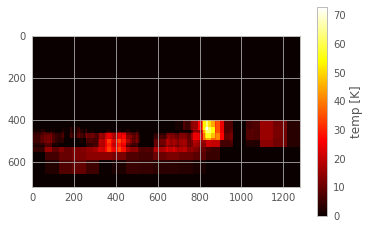

In [12]:
T = testh.temperatures[-1]
fig, ax = plt.subplots()
im = ax.imshow(T, origin='upper', cmap='hot')
fig.colorbar(im, label='temp [K]')

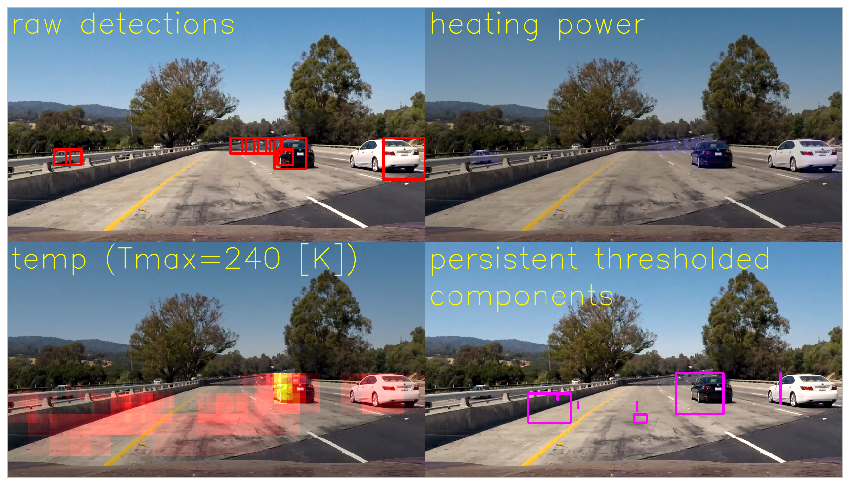

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.imshow(testh.vidFrame)
ax.set_xticks([])
ax.set_yticks([]);

# Run the detector on the project video.

In [4]:
projh = vehicleDetection.temporal.HeatVideo(fpath='../../../data/vehicleDetection/project_video.mp4')

In [ ]:
projh.go(detectorNoAug);

In [8]:
projh.load('/home/tsbertalan/data/vehicleDetection/backup.npz')

In [13]:
projh.persist(tempThresh)

HBox(children=(IntProgress(value=0, description='cooling: ', max=1140), HTML(value='')))

HBox(children=(IntProgress(value=0, description='persist bboxes: ', max=1140), HTML(value='')))

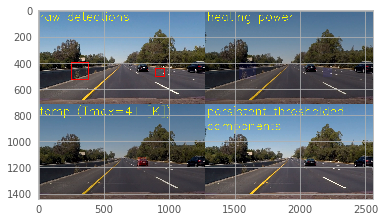

In [14]:
%%time
projh.video();

Generating video.


HBox(children=(IntProgress(value=0, description='hmax?: ', max=1140), HTML(value='')))

HBox(children=(IntProgress(value=1, bar_style='info', description='project_video-detected.mp4: ', max=1), HTML(value='')))

Generating 1140 video frames.

CPU times: user 55.7 s, sys: 6.84 s, total: 1min 2s
Wall time: 4min 47s


# Try again on the agumented data.

In [5]:
images, classes = vehicleDetection.data.getData()

HBox(children=(IntProgress(value=0, max=6726), HTML(value='')))

In [5]:
detectorAug = vehicleDetection.detector.Detector()
detectorAug.label = 'augmented'

Got scalar parameter (C). Assuming no CV requested.


In [6]:
detectorAug.load('/home/tsbertalan/data/vehicleDetection/detector (augmented).npz')

In [23]:
print('Estimated fit/test runtime is %.3g minutes.' % (len(images) * spi / 60.,))

Estimated fit/test runtime is 1.75 minutes.


In [24]:
# %%time
# detectorAug.fit(
#     images,
#     classes,
# )

11582-image train accuracy of clf =  0.940252115351
1288-image test accuracy of clf =  0.604813664596
Saving to data/detector.npz ... done.
CPU times: user 12min 28s, sys: 1.53 s, total: 12min 29s
Wall time: 13min 22s


In [27]:
testh.go(detectorAug)

Number of support vectors for each class: [1485 1589]


HBox(children=(IntProgress(value=0, description='processing: ', max=38), HTML(value='')))


Saving to /home/tsbertalan/data/vehicleDetection/detections-test_video.h5 ... 

HBox(children=(IntProgress(value=0, description='power images: ', max=38), HTML(value='')))


done.


In [ ]:
testh.save()

In [24]:
testh.load('/home/tsbertalan/data/vehicleDetection/detections-test_video.h5')

In [25]:
testh.persist()
testh.video(label='-augmented')

HBox(children=(IntProgress(value=0, description='cooling: ', max=38), HTML(value='')))

HBox(children=(IntProgress(value=0, description='persist bboxes: ', max=38), HTML(value='')))


Generating video doc/test_video-detected-augmented.mp4.


HBox(children=(IntProgress(value=0, description='hmax?: ', max=38), HTML(value='')))

HBox(children=(IntProgress(value=0, description='test_video-detected-augmented.mp4: ', max=38), HTML(value='')))

Generating 38 video frames.



In [ ]:
projh.go(detectorAug)

Number of support vectors for each class: [1485 1589]


HBox(children=(IntProgress(value=0, description='processing: ', max=1260), HTML(value='')))

In [7]:
projh.load('/home/tsbertalan/data/vehicleDetection/detections-project_video-augmented.h5')

In [8]:
import gc; gc.collect()

0

In [9]:
projh.persist(15)
projh.video(label='-augmented')

HBox(children=(IntProgress(value=0, description='cooling: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='persist bboxes: ', max=1260), HTML(value='')))


Generating video doc/project_video-detected-augmented.mp4.


HBox(children=(IntProgress(value=0, description='hmax?: ', max=1260), HTML(value='')))

HBox(children=(IntProgress(value=0, description='project_video-detected-augmented.mp4: ', max=1260), HTML(value='')))

Generating 1260 video frames.

